# Projeto Integrador Parte D

Entregas: 
1) Faça um relatório respondendo cada pergunta separadamente. 
2) Link para a base utilizada. 
3) Código completo em Python.

Dando continuidade ao Projeto Integrador - Parte A, faça uma análise dos mesmos dados utilizados anteriormente, respondendo às seguintes questões:


### ALUNAS
- Gabriella Braz
- Giovana Ribeiro

In [24]:
# Importar bibliotecas necessárias
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
df = pd.read_csv("data/tb_1.csv")
print(df.dtypes)

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object


In [26]:
df["target"] = (
    (df["math_score"] + df["reading_score"] + df["writing_score"]) / 3 >= 60
).astype(int)

In [27]:
# Separar preditores e alvo
X = df.drop("target", axis=1)
y = df["target"]

In [28]:
# Transformar variáveis categóricas em dummies
X = pd.get_dummies(X, drop_first=True)

In [29]:
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [30]:
# Treinar modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Previsões
y_pred = knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)[:, 1]

In [31]:
# AUC-ROC (como é binário, podemos calcular diretamente)
auc_roc = roc_auc_score(y_test, y_pred_proba)

# Acurácia
accuracy = accuracy_score(y_test, y_pred)
# Precision
precision = precision_score(y_test, y_pred, average="weighted")
# Recall
recall = recall_score(y_test, y_pred, average="weighted")
# F1-Score
f1 = f1_score(y_test, y_pred, average="weighted")

# Exibir resultados
print(f"AUC-ROC Score: {auc_roc:.4f}")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

AUC-ROC Score: 0.9995
Acurácia: 0.9833
Precisão: 0.9834
Recall: 0.9833
F1-Score: 0.9834


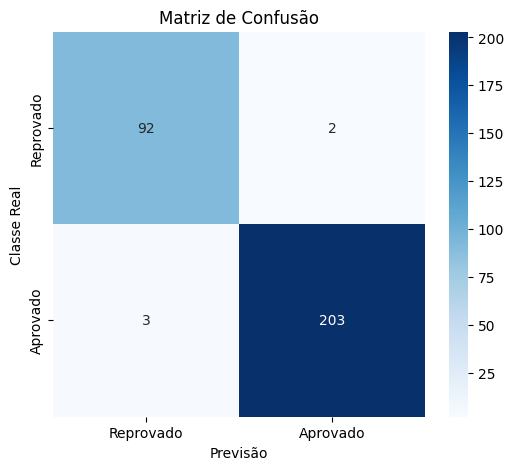

In [32]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Reprovado", "Aprovado"],
    yticklabels=["Reprovado", "Aprovado"],
)
plt.title("Matriz de Confusão")
plt.xlabel("Previsão")
plt.ylabel("Classe Real")
plt.show()